In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv",";")
df

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,10001-2020-06-10T15:10:00+02:00,10/06/2020,Viken,Nordøst,Lillestrøm,Brauterkrysset,Nordsnoveien,Lokal,Viken,100,1,16:23:18,16:23:48,16:10:00,16:10:00,151,2
5996,10010-2020-06-23T05:54:00+02:00,23/06/2020,Viken,Nordøst,Lillestrøm,Vestbygata,Bjørnsons gate,Lokal,Viken,100,0,06:00:32,06:00:40,05:59:00,05:59:00,151,2
5997,2007-2020-06-11T17:22:00+02:00,11/06/2020,Oslo,Indre By,Sagene,Torshovparken (mot Torshovparken),Torshov (mot Bentsebrua),Lokal,Oslo,20,1,17:42:43,17:43:10,17:32:00,17:32:00,106,3
5998,10004-2020-08-13T04:59:00+02:00,13/08/2020,Oslo,Indre By,Gamle Oslo,Harald Hårdrådes plass (mot Grønland),Oslo gate (mot Grønland),Lokal,Viken,100,0,06:00:11,06:00:23,05:59:00,05:59:00,151,5


In [3]:
df["Faktisk_Ankomst"] = df["Dato"] + " " + df["Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra"]
df["Faktisk_Avgang"] = df["Dato"] + " " + df["Tidspunkt_Faktisk_Avgang_Holdeplass_Fra"]
df["Planlagt_Ankomst"] = df["Dato"] + " " + df["Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra"]
df["Planlagt_Avgang"] = df["Dato"] + " " + df["Tidspunkt_Planlagt_Avgang_Holdeplass_Fra"]


In [4]:
df['Faktisk_Ankomst'] = pd.to_datetime(df['Faktisk_Ankomst'], errors='coerce')
df['Faktisk_Avgang'] = pd.to_datetime(df['Faktisk_Avgang'], errors='coerce')
df['Planlagt_Ankomst'] = pd.to_datetime(df['Planlagt_Ankomst'], errors='coerce')
df['Planlagt_Avgang'] = pd.to_datetime(df['Planlagt_Avgang'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   TurId                                      6000 non-null   object        
 1   Dato                                       6000 non-null   object        
 2   Fylke                                      6000 non-null   object        
 3   Område                                     6000 non-null   object        
 4   Kommune                                    6000 non-null   object        
 5   Holdeplass_Fra                             6000 non-null   object        
 6   Holdeplass_Til                             6000 non-null   object        
 7   Linjetype                                  6000 non-null   object        
 8   Linjefylke                                 6000 non-null   object        
 9   Linjenavn          

In [5]:
df["forsink_ankomst"] = df["Faktisk_Ankomst"] - df["Planlagt_Ankomst"] 
df["forsink_Avgang"] = df["Faktisk_Avgang"] - df["Planlagt_Avgang"]

In [6]:
from pandas.api.types import is_numeric_dtype
def remove_outlier(df):
    low = .1
    high = .90
    quant_df = df.quantile([low, high])
    if is_numeric_dtype(df):
        df = df[(df > quant_df.loc[low]) & (df < quant_df.loc[high])]
    return df

In [7]:
df_Buss_150 = df[df["Linjenavn"] == "150"]
df_Buss_150 = df_Buss_150.set_index("Tidspunkt_Planlagt_Avgang_Holdeplass_Fra")
df_Buss_150 = df_Buss_150.sort_values(by='Tidspunkt_Planlagt_Avgang_Holdeplass_Fra')


Text(0, 0.5, '\n Forsinkelsestimer')

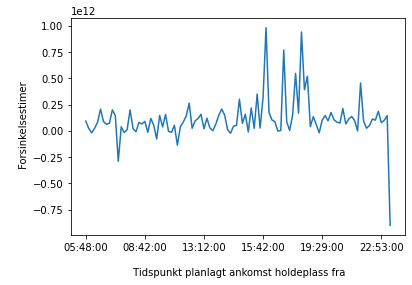

In [8]:
df_Buss_150["forsink_ankomst"].plot()
plt.xlabel('\n Tidspunkt planlagt ankomst holdeplass fra')
plt.ylabel('\n Forsinkelsestimer')

In [9]:
df_Buss_150["forsink_ankomst"].min()

Timedelta('-1 days +23:45:00')

In [10]:
df_Buss_150[df_Buss_150["forsink_ankomst"] == '-1 days +23:45:00']

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Faktisk_Ankomst,Faktisk_Avgang,Planlagt_Ankomst,Planlagt_Avgang,forsink_ankomst,forsink_Avgang
Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,,,,,,,,,,,,,,,,,,,,,
23:39:00,15014-2020-08-27T23:39:00+02:00,27/08/2020,Viken,Vest,Bærum,Gullhaug,Gruvemyra,Lokal,Viken,150,...,23:40:33,23:39:00,112,0,2020-08-27 23:24:00,2020-08-27 23:40:33,2020-08-27 23:39:00,2020-08-27 23:39:00,-1 days +23:45:00,00:01:33


In [13]:
# df_new = df_Buss_150["forsink_ankomst"] < "0 days 00:00:24.75"
# df_Buss_150.loc[df_new,"forsink_ankomst"] = "0 days 00:00:24.75"

Text(0, 0.5, '\n Forsinkelsestimer')

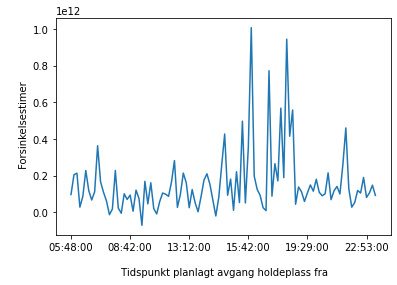

In [15]:
df_Buss_150["forsink_Avgang"].plot()
plt.xlabel('\n Tidspunkt planlagt avgang holdeplass fra')
plt.ylabel('\n Forsinkelsestimer')

In [16]:
list_Buss = []
for i in df["Kommune"].unique():
    list_Buss.append(len(df[df["Kommune"] == i]["Linjenavn"].unique()))

In [17]:
df_Kommune_Buss = pd.DataFrame()
df_Kommune_Buss["Kommune"] = df["Kommune"].unique()
df_Kommune_Buss["Antall_Buss"] = list_Buss
df_Kommune_Buss = df_Kommune_Buss.set_index("Kommune")

Text(0, 0.5, 'Antall_Buss')

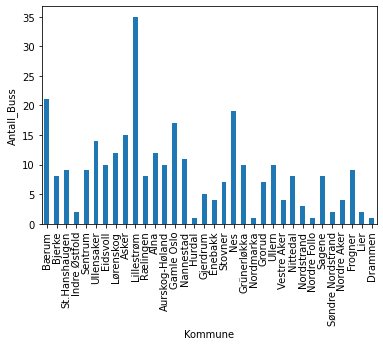

In [18]:
df_Kommune_Buss["Antall_Buss"].plot.bar()
plt.xlabel('Kommune')
plt.ylabel('Antall_Buss')

In [19]:
df_RushTid_150 = pd.DataFrame()
for index,row in df_Buss_150.iterrows():
    if ("06:00" <= index <= "09:00") or ("15:00" <= index <= "18:00") :
        df_RushTid_150 = df_RushTid_150.append(row, ignore_index=True)

df_RushTid_150


,Dato,Faktisk_Ankomst,Faktisk_Avgang,Fylke,Holdeplass_Fra,Holdeplass_Til,Kjøretøy_Kapasitet,Kommune,Linjefylke,Linjenavn,...,Område,Passasjerer_Ombord,Planlagt_Ankomst,Planlagt_Avgang,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,TurId,forsink_Avgang,forsink_ankomst
0,22/07/2020,2020-07-22 06:13:41,2020-07-22 06:17:34,Viken,Bekkestua bussterminal (Plattform C),Stabekk skole,112.0,Bærum,Viken,150,...,Vest,6.0,2020-07-22 06:14:00,2020-07-22 06:14:00,06:13:41,06:17:34,06:14:00,15005-2020-07-22T05:54:00+02:00,00:03:34,-1 days +23:59:41
1,27/07/2020,2020-07-27 06:20:24,2020-07-27 06:20:29,Oslo,Hammersborggata (ved Storgata retning vest),St. Olavs plass (mot Frederiks gate),112.0,St.Hanshaugen,Viken,150,...,Indre By,-1.0,2020-07-27 06:20:00,2020-07-27 06:20:00,06:20:24,06:20:29,06:20:00,15003-2020-07-27T06:18:00+02:00,00:00:29,00:00:24
2,22/07/2020,2020-07-22 06:25:23,2020-07-22 06:25:28,Viken,Tjernsmyr,Lysaker stasjon (E18 mot Vækerø) (plf G),112.0,Bærum,Viken,150,...,Vest,11.0,2020-07-22 06:24:00,2020-07-22 06:24:00,06:25:23,06:25:28,06:24:00,15005-2020-07-22T05:54:00+02:00,00:01:28,00:01:23
3,12/08/2020,2020-12-08 06:54:27,2020-12-08 06:54:49,Viken,Åsterud,Godthåb,112.0,Bærum,Viken,150,...,Vest,1.0,2020-12-08 06:51:00,2020-12-08 06:51:00,06:54:27,06:54:49,06:51:00,15003-2020-08-12T06:18:00+02:00,00:03:49,00:03:27
4,29/07/2020,2020-07-29 07:12:29,2020-07-29 07:13:00,Viken,Øvre Toppenhaug,Nedre Toppenhaug,112.0,Bærum,Viken,150,...,Vest,-1.0,2020-07-29 07:11:00,2020-07-29 07:11:00,07:12:29,07:13:00,07:11:00,15004-2020-07-29T06:33:00+02:00,00:02:00,00:01:29
5,15/08/2020,2020-08-15 07:34:02,2020-08-15 07:34:08,Oslo,Vækerø (E18 på nordsiden mot Lysaker),Lysaker stasjon (Plattform A),112.0,Ullern,Viken,150,...,Vest,1.0,2020-08-15 07:33:00,2020-08-15 07:33:00,07:34:02,07:34:08,07:33:00,21001-2020-08-15T07:18:00+02:00,00:01:08,00:01:02
6,27/08/2020,2020-08-27 07:34:13,2020-08-27 07:34:53,Viken,Lysaker stasjon (Plattform A),Tjernsmyr,112.0,Bærum,Viken,150,...,Vest,10.0,2020-08-27 07:33:00,2020-08-27 07:33:00,07:34:13,07:34:53,07:33:00,15002-2020-08-27T07:15:00+02:00,00:01:53,00:01:13
7,17/08/2020,2020-08-17 07:42:20,2020-08-17 07:45:04,Viken,Bærums verk,Nedre Toppenhaug,112.0,Bærum,Viken,150,...,Vest,6.0,2020-08-17 07:39:00,2020-08-17 07:39:00,07:42:20,07:45:04,07:39:00,15014-2020-08-17T07:34:00+02:00,00:06:04,00:03:20
8,08/08/2020,2020-08-08 07:42:24,2020-08-08 07:42:47,Viken,Stabekk kino,Skallum,112.0,Bærum,Viken,150,...,Vest,7.0,2020-08-08 07:40:00,2020-08-08 07:40:00,07:42:24,07:42:47,07:40:00,21001-2020-08-08T07:18:00+02:00,00:02:47,00:02:24
9,07/08/2020,2020-07-08 07:40:10,2020-07-08 07:46:50,Oslo,Oslo bussterminal (Plf A18),Hammersborggata (ved Storgata retning vest),112.0,Gamle Oslo,Viken,150,...,Indre By,1.0,2020-07-08 07:45:00,2020-07-08 07:45:00,07:40:10,07:46:50,07:45:00,15009-2020-08-07T07:45:00+02:00,00:01:50,-1 days +23:55:10


Text(0, 0.5, 'Delay Time')

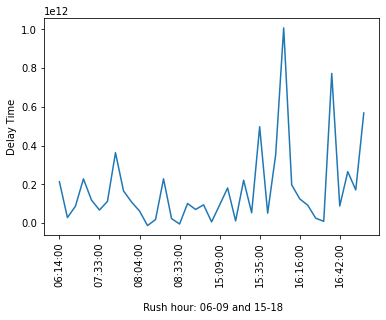

In [20]:
df_RushTid_150 = df_RushTid_150.sort_values(by='Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra')

df_RushTid_150 = df_RushTid_150.set_index("Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra") 
df_RushTid_150["forsink_Avgang"].plot()
plt.xticks(rotation=90)
plt.xlabel('\n Rush hour: 06-09 and 15-18')
plt.ylabel('Delay Time')

Text(0, 0.5, 'Delay Time')

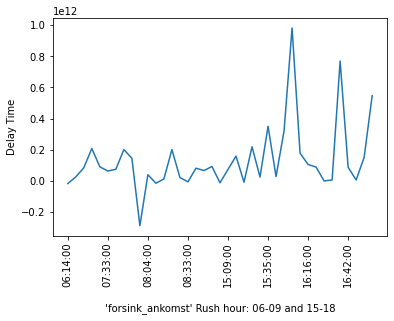

In [22]:
df_RushTid_150["forsink_ankomst"].plot()
plt.xticks(rotation=90)
plt.xlabel('\n \'forsink_ankomst\' Rush hour: 06-09 and 15-18 ')
plt.ylabel('Delay Time')